<a href="https://colab.research.google.com/github/bethmorais/ead-iad/blob/master/aed_iad_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação da Base e Primeiros Ajustes** 

Os dados foram coletados a partir do kaggle (https://www.kaggle.com/wenruliu/adult-income-dataset), tendo sido exportados para uma planilha csv, disponibilizada no git do projeto.

In [0]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/bethmorais/ead-iad/master/adult.csv', na_values="?")
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


Verificação dos tipos de dados inferidos pelo pandas

In [0]:
dataset.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Ajustando a definição dos tipos de dados.

In [0]:
#ajustando tipos dos dados
dataset['workclass'] = dataset['workclass'].astype('category')
dataset['education'] = dataset['education'].astype('category')
dataset['marital-status'] = dataset['marital-status'].astype('category')
dataset['occupation'] = dataset['occupation'].astype('category')
dataset['relationship'] = dataset['relationship'].astype('category')
dataset['race'] = dataset['race'].astype('category')
dataset['gender'] = dataset['gender'].astype('category')
dataset['native-country'] = dataset['native-country'].astype('category')
dataset['income'] = dataset['income'].astype('category')
dataset['capital-gain'] = dataset['capital-gain'].astype('float')
dataset['capital-loss'] = dataset['capital-loss'].astype('float')
dataset.dtypes

age                   int64
workclass          category
fnlwgt                int64
education          category
educational-num       int64
marital-status     category
occupation         category
relationship       category
race               category
gender             category
capital-gain        float64
capital-loss        float64
hours-per-week        int64
native-country     category
income             category
dtype: object

Verificando a quantidade de instâncias (linhas) e atributos (colunas) antes de limpar os dados

In [0]:
dataset.shape

(48842, 15)

Eliminando linhas repetidas 

Realmente é necessário remover as linhas repetidas? Acho é factivel ter linhas repetidas para esse tipo de pesquisa!


In [0]:
dataset.drop_duplicates(keep = False, inplace = True)

Verificando a quantidade de instâncias com atributos nulos

In [0]:
print(dataset.isnull().sum())

age                   0
workclass          2791
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2801
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      855
income                0
dtype: int64


In [0]:
#dataset[dataset.workclass.str.match("\?")]

Tratamento de dados ausentes: Removendo as instâncias com atributos nulos, uma vez que a categoria é um atributo relevante (obrigatório) e a quantidade de registros nulos representa ~6% do total de instâncias

In [0]:
df2 = dataset.dropna(axis=0)

In [0]:
df2.shape

(45131, 15)

Certificando que todos os registros nulos foram removidos.

In [0]:
print(df2.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [0]:
dataset = df2

In [0]:
df2.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45131.000000,4.513100e+04,45131.000000,45131.000000,45131.000000,45131.000000
mean,38.563426,1.897468e+05,10.119851,1103.651215,88.774058,40.947176
std,13.212944,1.056640e+05,2.551194,7513.831139,405.344601,12.007629
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173965e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378705e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Dentre as variáveis contínuas, estamos vendo valores máximos que são muito distantes dos valores do terceiro quartil e também muito maiores que a média acrescida de dois desvios-padrão em "age","capital-gain", "capital-loss" e "hours-per-week", vamos fazer o boxplot e/ou histograma de cada uma destas variáveis. Podemos pensar na possibilidade da existência de outliers.

In [0]:
df2["capital-gain"].value_counts()

0.0        41341
15024.0      498
7688.0       391
7298.0       351
99999.0      229
           ...  
22040.0        1
1731.0         1
2387.0         1
1639.0         1
7262.0         1
Name: capital-gain, Length: 121, dtype: int64

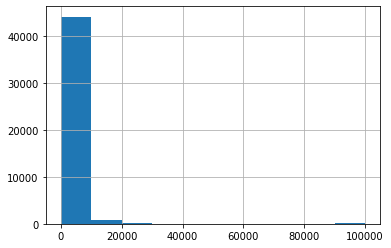

In [0]:
df2["capital-gain"].hist()

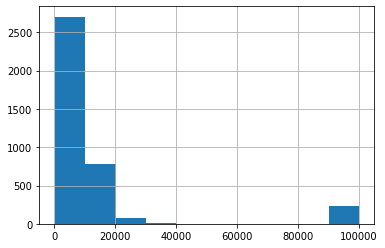

In [0]:
df2[(df2['capital-gain'] > 0)]['capital-gain'].hist()

In [0]:
df2[(df2['capital-gain'] > 0)]['capital-gain'].describe()

count     3790.000000
mean     13142.185488
std      22676.003955
min        114.000000
25%       3464.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [0]:
df2["capital-loss"].value_counts()

0       42991
1902      294
1977      246
1887      228
2415       68
        ...  
2201        1
1421        1
4356        1
2163        1
1870        1
Name: capital-loss, Length: 97, dtype: int64

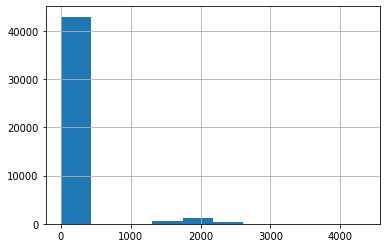

In [0]:
df2["capital-loss"].hist()

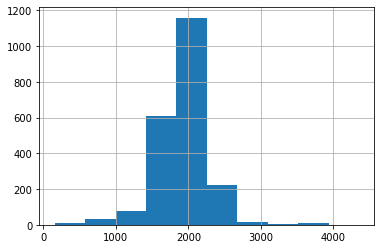

In [0]:
df2[(df2['capital-loss'] > 0)]['capital-loss'].hist()

In [0]:
df2[(df2['capital-loss'] > 0)]['capital-loss'].describe

<bound method NDFrame.describe of 52       1721.0
82       1876.0
129      2415.0
143      1887.0
154      1887.0
          ...  
48722    1887.0
48724    1602.0
48726    1669.0
48739    1977.0
48781     880.0
Name: capital-loss, Length: 2140, dtype: float64>

Pelos histogramas e contagem dos valores, vemos que "capital-gain" e "capital-loss" não possuem valores aberrantes pura e simplemente, mas que a maioria dos valores são nulos. 

Sendo assim, as estatísticas posicionais como quartis detectarão a existência de outliers sem que necessariamente seja o caso. Dessa forma, não poderíamos usar o Inter Quartile Range (método de Tuckey) como técnica para detecção de outliers nestas variáveis como estão, pois eles são baseados em estatísticas posicionais. 

Como "capital-loss" parece ter uma distribuição simétrica, com valores entre 1000 e 4000, o que podemos fazer é retirar os valores nulos e então investigar a presença de outliers pelos métodos de Tuckey e z-score robusto.

In [0]:
df2["hours-per-week"].describe()

count    45131.000000
mean        40.947176
std         12.007629
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

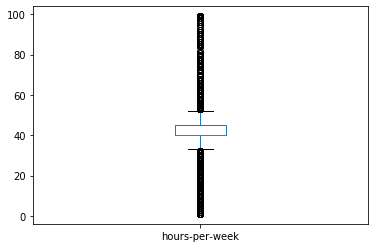

In [0]:
df2["hours-per-week"].plot.box()

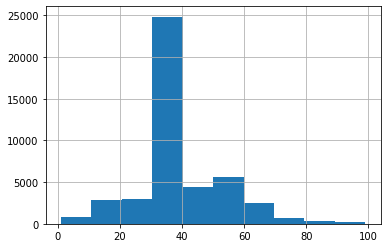

In [0]:
df2["hours-per-week"].hist()

Já no caso da variável "hours-per-week", temos uma continuidade muito maior de valores. Ainda assim, há observações de 99h semanais e 1h semanal. Aplicaremos as formas de detecção de outliers a seguir.   

In [0]:
df2["age"].describe()

count    45131.000000
mean        38.563426
std         13.212944
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

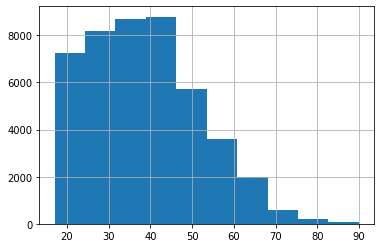

In [0]:
df2["age"].hist()

Age se distribui e possui valores etários bastante razoáveis. Não indica sinais de outliers nesta variável.

#**Teste para Presença e Eliminação de Outliers** 

### 1. Eliminação de outliers de horas semanais trabalhadas ('hours-per-week')

Como vimos no tópico anterior, temos indicações de que algumas das  variáveis contínuas possuem outliers. 

### 1.1. Utilizando o método Z-score robusto 
Agora vamos adaptar as variáveis e retirar estas observações com valores discrepantes indevidos. 

In [0]:
mad = abs(df2['hours-per-week'] - df2['hours-per-week'].median()).median()*(1/0.6745)
print(mad)

4.447739065974796


In [0]:
df2["hours-per-week"].describe()

count    45131.000000
mean        40.947176
std         12.007629
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

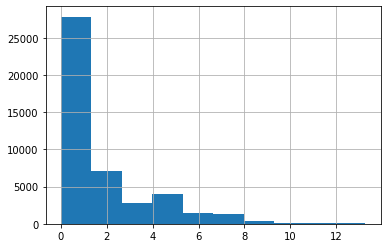

In [0]:
(abs(df2['hours-per-week']-df2['hours-per-week'].median())/mad).hist()

Aqui estabelecemos outra base chamada df3, que estará sem os outliers.

In [56]:
df3 = df2[abs(df2['hours-per-week']-df2['hours-per-week'].median())/mad < 3.5]
print(len(df3))

37239


In [57]:
df3['hours-per-week'].describe()

count    37239.000000
mean        41.008486
std          5.739248
min         25.000000
25%         40.000000
50%         40.000000
75%         43.000000
max         55.000000
Name: hours-per-week, dtype: float64

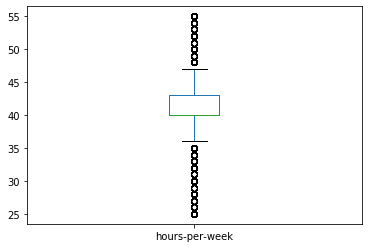

In [0]:
df3["hours-per-week"].plot.box()

A variação de 'hours-per-week' pós retirada de observações detectadas como outliers pelo desvio da mediana revela uma distribuição mais razoável, com relatos de pessoas no mínimo trabalhando 25h/semana (5h/dia) e no máximo trabalhando 55h/semana (11h/dia), o que parecem dados mais razoáveis. Mesmo com a maior flexibilidade do mercado de trabalho norte-americano, é viável encontrar cargas de trabalho com tal magnitude. 

Pelo boxplot podemos ver que ainda há resultados que seriam contabilizados fora do critério do Inter Quartile Range (IQR) do método de Tuckey: todos os dados fora das barras externas seriam entendidos como outliers por este critério. No entanto, para conter dados que caracterizem melhor este mercado de trabalho menos regulamentado e um pouco mais diverso em termos de carga horária, iremos manter tais dados que ficariam fora do critério do IQR. 

In [0]:
q1 = df2['hours-per-week'].quantile(q=0.25)
q3 = df2['hours-per-week'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

5.0


### 1.2. Utilizando o método de Tuckey

A título de exemplo, iremoa criar a base df4, retirando todas as observações entendidas como outliers dentro dos critérios desse método. 

In [0]:
df4 = df2[df2['hours-per-week'] < (q1-1.5*iqr)]

O boxplot desta base de dados está aqui. Note que o intervalo de dados restante é muito mais restrito do que em df3. 

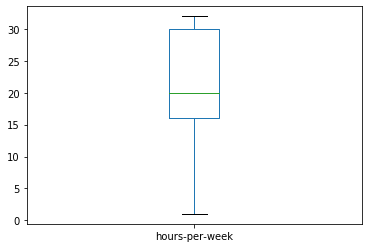

In [0]:
df4["hours-per-week"].plot.box()

Também podemos observar que teríamos uma quantidade muito reduzida de observações, de 37.239 dados, usando o método de retirada de outliers baseado na MAD (distância absoluta da mediana) contra 6.900 observações usando o método de Tuckey. Além da questão de que a variabilidade de contratos de trabalho, fundamental para descrever a renda dos indivíduos amostrados neste país, seria perdida. 

Além disso, pela descrição da variável, o método de Tuckey identificou apenas outliers com valores muito altos em detrimento de outliers com valores muito baixos. Tal fenômeno pode ser entendido através do fato de que haverá um quantitativo maior de pessoas com empregos de meio expediente ou expediente parcial (com menos de 40h semanais), como estudantes, pessoas que possuem contratos mais flexíveis e trabalhadores sazonais ou temporários. 
Já trabalhadores que ultrapassem uma jornada de 11h diárias, 5 dias por semana são muito pontuais (e em alguns casos, provavelmente erros de digitação ou coleta mesmo). 

Sendo assim, com uma mudança mais suave de quantidade de horas trabalhadas, os quantis anteriores aos .50 (mediana) terão valores muito mais próximos do que os quantis de valor maior que a mediana. Assim, a distância interquartis da metade maior será mais facilmente detectada. Nesta base de dados, isto se dá de modo tão intenso que nenhuma observação da metade menor dos dados foi lida como outlier por este método.  

Por conta disso, o IQR detectou apenas outliers de valor muito alto, mas o fez de modo a reduzir muito a amostra e tornando-a viesada para os casos de poucas horas, tendo um desvio-padrão um tanto maior e uma média muito menor. 

O valor médio de 'hours-per-week' na base de dados original, a df2, era de 40.947176. Já a média de 'hours-per-week' em df3 é de 41.008486, enquanto em df4 é de 21.564493. A mudança do valor médio, quase a metade em df4, nos faz perceber que a forma de retirar outliers pelo método de Tuckey trouxe uma distorção aos dados, que já não caracterizam a amostra de maneira tão equilibrada. 

Sendo assim, voltaremos a usar df3 e não df4.

In [0]:
df4['hours-per-week'].describe()

count    6900.000000
mean       21.564493
std         7.410580
min         1.000000
25%        16.000000
50%        20.000000
75%        30.000000
max        32.000000
Name: hours-per-week, dtype: float64

 ### 2. Eliminação de outliers de rendimentos fora do trabalho principal ('capital-gain' e 'capital-loss')

# **Início da Análise de renda extra (Rendimentos fora do trabalho principal)** 

In [0]:
df3.dtypes

age                   int64
workclass          category
fnlwgt                int64
education          category
educational-num       int64
marital-status     category
occupation         category
relationship       category
race               category
gender             category
capital-gain        float64
capital-loss        float64
hours-per-week        int64
native-country     category
income             category
capital-result      float64
capital-result3     float64
dtype: object

In [58]:
df3['capital-result'] = df3['capital-gain'] - df3['capital-loss']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df3.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital-result,capital-result3
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40,United-States,<=50K,0.0,0.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50,United-States,<=50K,0.0,0.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40,United-States,>50K,0.0,0.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40,United-States,>50K,7688.0,7688.0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30,United-States,<=50K,0.0,0.0


In [0]:
df3['capital-result'].describe()

count    37239.000000
mean       911.477967
std       6866.495440
min      -3900.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-result, dtype: float64

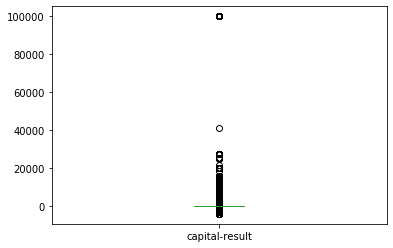

In [0]:
df3['capital-result'].plot.box()

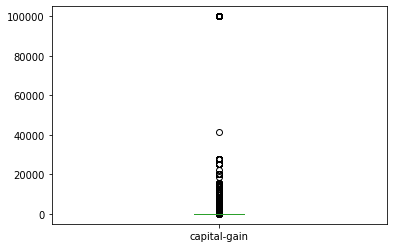

In [0]:
df3['capital-gain'].plot.box()

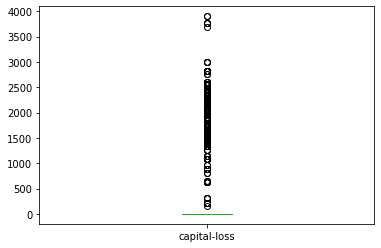

In [0]:
df3['capital-loss'].plot.box()

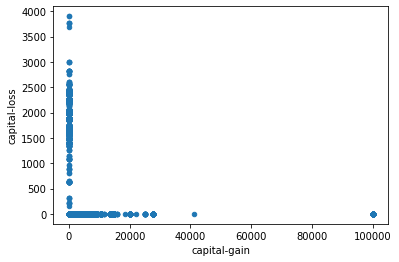

In [0]:
df3.plot.scatter(x='capital-gain',y='capital-loss')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca3d55a0b8>,
      dtype=object)

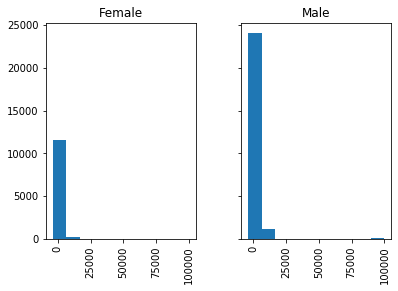

In [0]:
df3['capital-result'].hist(by=df3['gender'],sharex=True , sharey=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca3fdd6c50>,
      dtype=object)

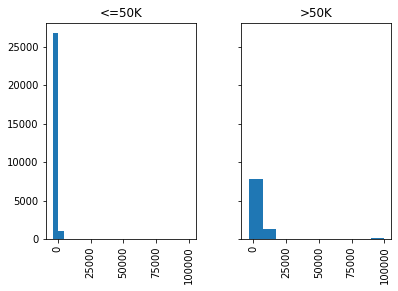

In [0]:
df3['capital-result'].hist(by=df3['income'],sharex=True, sharey=True)

# Verificando o comportamento da renda extra (capital-result) com relação aos outros atributos

In [70]:
df3.groupby("marital-status").size()

marital-status
Divorced                  5490
Married-AF-spouse           25
Married-civ-spouse       17587
Married-spouse-absent      458
Never-married            11504
Separated                 1252
Widowed                    923
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd554d95358>,
      dtype=object)

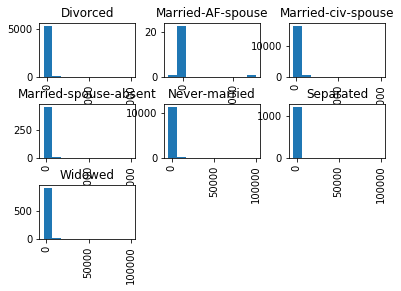

In [71]:
df3['capital-result'].hist(by=df3['marital-status'])

Observamos que as pessoas que nunca casaram ou do estado civil "married-civ-spouse" possuem maior renda extra.

In [72]:
df3.groupby("workclass").size()

workclass
Federal-gov          1265
Local-gov            2662
Never-worked            0
Private             28005
Self-emp-inc         1140
Self-emp-not-inc     2563
State-gov            1592
Without-pay            12
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd554ba53c8>,
      dtype=object)

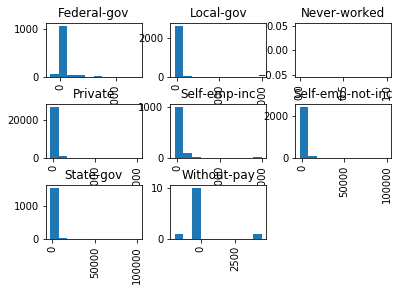

In [73]:
df3['capital-result'].hist(by=df3['workclass'])

Observamos que as pessoas que possuem contrato de trabalho privado possuem maior renda-extra.

# **Educação e Anos de Estudo**



Avaliando o atributo "educational-num" (anos de estudo) percebemos que ele não representa uma variável contínua e sim uma classificação categórica de acordo com o atributo "education", visto que representa com o valor "1" pessoas que cursaram entre a primeira e a quarta séries, com o valor "2" pessoas entre a quinta e a sexta séries, com o valor "6" pessoas que cursaram o segundo ano do ensino médio, e assim por diante.

Ou seja, não há uma correspondência linear entre o número em "educational-num" e a quantidade de anos estudados. 

Sendo assim, tais dados podem nos dar a representação de uma relação não linear, mas monotônica, entre ela e outras variáveis possivelmente relacionadas. Portanto, vamos usar como coeficiente de correlação o  de Spearman e não o de Pearson para tratar  "educational-num", que será uma variável-chave.

In [0]:
df3.groupby(["educational-num", "education"]).size()


educational-num  education   
1                Preschool          56
2                1st-4th           178
3                5th-6th           384
4                7th-8th           658
5                9th               575
6                10th              941
7                11th             1098
8                12th              431
9                HS-grad         12659
10               Some-college     7879
11               Assoc-voc        1703
12               Assoc-acdm       1279
13               Bachelors        6393
14               Masters          2054
15               Prof-school       558
16               Doctorate         393
dtype: int64

No histograma abaixo vemos que nos pontos de alguns marcos de formação educacional há uma maior incidência de registros nas seguintes categorias:

9 - Pessoas formadas no ensino médio

10- Pessoas que iniciaram a universidade

13 - Bacharéis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd55592a240>]],
      dtype=object)

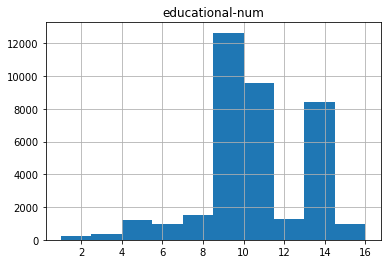

In [39]:
df3.hist("educational-num")

Verificando a correlação entre os atributos




In [40]:
df3.corr(method='spearman')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,capital-result,capital-result3
age,1.000000,-0.077766,0.049565,0.112842,0.057034,0.108685,0.055296,0.055296
fnlwgt,-0.077766,1.000000,-0.040806,-0.011292,-0.003588,-0.018033,-0.006736,-0.006736
educational-num,0.049565,-0.040806,1.000000,0.115419,0.074203,0.150435,0.047527,0.047527
capital-gain,0.112842,-0.011292,0.115419,1.000000,-0.067195,0.081265,0.818753,0.818753
capital-loss,0.057034,-0.003588,0.074203,-0.067195,1.000000,0.050636,-0.627859,-0.627859
hours-per-week,0.108685,-0.018033,0.150435,0.081265,0.050636,1.000000,0.034337,0.034337
capital-result,0.055296,-0.006736,0.047527,0.818753,-0.627859,0.034337,1.000000,1.000000
capital-result3,0.055296,-0.006736,0.047527,0.818753,-0.627859,0.034337,1.000000,1.000000


Com base na correlação de spearman podemos observar que quem estudou mais, trabalha mais horas por semana e possui um maior ganho de capital.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5558a9128>,
      dtype=object)

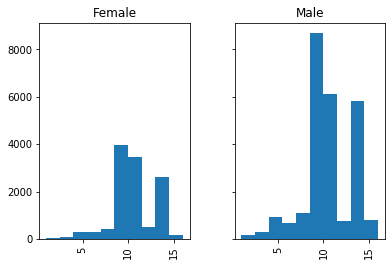

In [43]:
df3['educational-num'].hist(by=df3['gender'], sharex=True, sharey=True)

Observamos que a maioria dos profissionais são do gênero masculino, porém a distribuição da escolaridade se comporta de forma diferente, tende uma menor dispersão no nível de escolaridade. 

income
<=50K    AxesSubplot(0.125,0.125;0.775x0.755)
>50K     AxesSubplot(0.125,0.125;0.775x0.755)
Name: educational-num, dtype: object

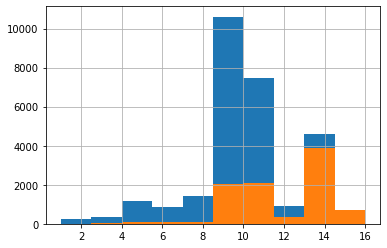

In [44]:
df3.groupby('income')['educational-num'].hist()

Observamos a maioria das pessoaas do grupo de maior renda fixa (>50K), possui maior escolaridade. E que a maioria dos profissionais possui nível técnico e renda fixa menor que 50K.

# **Normalização**
Observamos que não há mudança na distribuição dos atributos contínuos da amostra após normalização, entretanto iremos utilizar os métodos de normalização estudados apenas para fins didáticos.

# **Normalização de capital-gain**

# Método 1: Normalização segundo a amplitude
- Utiliza os valores mínimo e máximo


In [59]:
df3['capital_gain_norm1'] = ((df3['capital-gain'] - df3['capital-gain'].min()) / (df3['capital-gain'].max() - df3['capital-gain'].min())*2) -1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
df3['capital-gain'].describe()

count    37239.000000
mean       999.631757
std       6841.800494
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [54]:
df3['capital_gain_norm1'].describe()

count    37239.000000
mean        -0.980007
std          0.136837
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max          1.000000
Name: capital_gain_norm1, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5553b8e48>]],
      dtype=object)

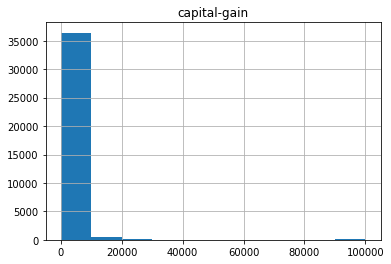

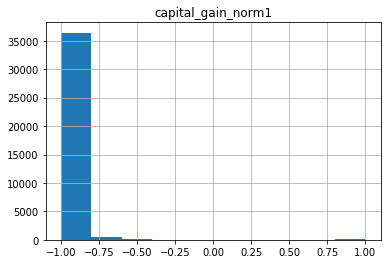

In [61]:
df3.hist('capital-gain')
df3.hist('capital_gain_norm1')

Outra forma de normalizar segundo a amplitude, utilando o pacote preprocessing da Scikit-Learn

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df2['capital_gain_norm2'] = scaler.fit_transform(df2[['capital-gain']])

In [0]:
df3['capital_gain_norm2'].describe()

count    45131.000000
mean         0.011037
std          0.075139
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: capital_gain_norm2, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f2c011898>]],
      dtype=object)

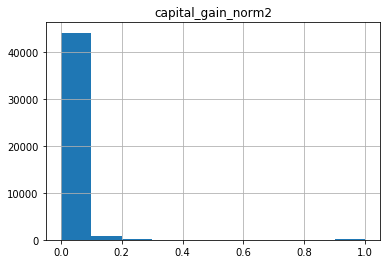

In [0]:
df3.hist('capital_gain_norm2')

# Método 2: normalização por desvio padrão
- Considera a posição média dos valores e os graus de dispersão em relação à posição média
- Útil quando mínimo e máximo são desconhecidos


In [0]:
df3['capital_gain_norm3'] = (df2['capital-gain'] - df2['capital-gain'].mean()) / (df2['capital-gain'].std())

In [0]:
df3['capital_gain_norm3'].describe()

count    4.513100e+04
mean     6.882984e-16
std      1.000000e+00
min     -1.468826e-01
25%     -1.468826e-01
50%     -1.468826e-01
75%     -1.468826e-01
max      1.316177e+01
Name: capital_gain_norm3, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f2bff1278>]],
      dtype=object)

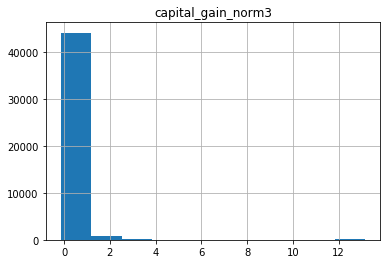

In [0]:
df3.hist('capital_gain_norm3')

Outra forma de normalizar por desvio padrão, utilando o pacote preprocessing da Scikit-Learn

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df2['capital_gain_norm4'] = scaler.fit_transform(df2[['capital-gain']])

In [0]:
df3['capital_gain_norm4'].describe()

count    4.513100e+04
mean    -1.764657e-16
std      1.000011e+00
min     -1.468842e-01
25%     -1.468842e-01
50%     -1.468842e-01
75%     -1.468842e-01
max      1.316192e+01
Name: capital_gain_norm4, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f2bf0ea20>]],
      dtype=object)

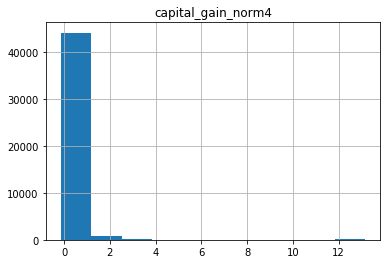

In [0]:
df3.hist('capital_gain_norm4')

# Normalização de "capital-result"

In [0]:
df3['capital-result'].describe()

count    45131.000000
mean      1014.877158
std       7537.766126
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-result, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f3c05aa90>]],
      dtype=object)

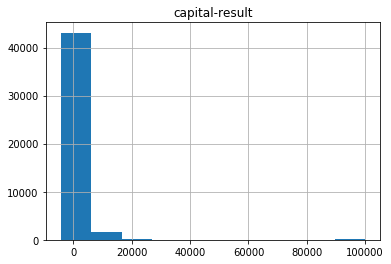

In [0]:
df3.hist('capital-result')

Como possuimos os valores mínimo e máximo, iremos utilizar o método de ormalização segundo a amplitude (método 1).

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df3['capital_result_norm1'] = MinMaxScaler().fit_transform(df2[['capital-result']])

In [0]:
df2['capital_result_norm1'].describe()

count    45131.000000
mean         0.051467
std          0.072232
min          0.000000
25%          0.041742
50%          0.041742
75%          0.041742
max          1.000000
Name: capital_result_norm1, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f2c2ba748>]],
      dtype=object)

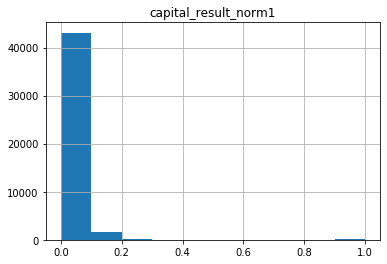

In [0]:
df3.hist('capital_result_norm1')